# Machine Learning project : Ensemble optimisation using hyperparameter and architecture search

## Part 1(A) Describing the data set :

The Data set is realted to features(11 features of different wines : fixed_acidity,	volatile_acidity, citric_acid, residual_  sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates and alcohol)
Also the data has quality of the wines which will be considered as label in the project.

There are two csv files related to the wine data set : 

1.Train file which will be used to implement training through various methods, also it will be used to test our models through validation sets. Further details will be followed later in the this notebook.

2.Test file is similar to the traning file in terms of features and label with less number of rows which will be used for implementing the final stage of the project which is testing an ensemble method and check the score.



I have created several functions to help with implementing and tunning the hyperparameters used in different methods.

Please see below all the imported libraries at the begining of my coding(python standard, sklearn and my own libraries) which will be helping me to achieve the goal we have been tasked to get to in this project.

In [1]:
import sys                    # import libraries
sys.path.append('./Library')
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

from sklearn.ensemble import RandomForestRegressor # import sklearn libraries
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score

from utils import rgb2gray, get_regression_data, visualise_regression_data # import our libraries
from assigning_library import read_csv_files, split_train_validation, split_features_labels
from regression_library import plot_models, hyper_3param_array

In [20]:
#######################################################################################################################
## This is Part 1 of the project where we read the train and test csv files and splittig them to features and labels ##
#######################################################################################################################

path_train_file = "./Data/winequality-red-train.csv" # assigning the train.csv file path to a variable
path_test_file = "./Data/winequality-red-test.csv" # assigning the test.csv file path to a variable

my_train_File, my_test_File = read_csv_files(path_train_file, path_test_file) # reading the csv files using pandas
                                                                       
header, X_train, X_validation, Y_train, Y_validation\
 = split_train_validation(my_train_File, split_rate=0.25) # splitting the train.csv to train and validation arrays

X_test, Y_test = split_features_labels(my_test_File) # splitting the test.csv file to features and label arrays

In [23]:
###################################################################################################################
############### This part is using RandomForest in Regression form(Part 2 of the Project) #########################
###################################################################################################################
best_regr_score_randomforest = 0 # variable which shows the best scoring RandomForest model
regr_score_randomforest = 0 # variable which shows the score for each of the Random Forest model

n_estimator_strarting_point = 100   # setting the range for n_estimators for different RandomForest models
n_estimator_ending_point = 500
n_estimator_step_size = 100  

max_features_starting_point = 2   # setting the range for max_features for different RandomForest models
max_features_ending_point = 10
max_features_step_size = 1    

max_depth_starting_point = 3    # setting the range for max_depth for different RandomForest models
max_depth_ending_point = 40
max_depth_step_size = 4

RF_hyper_param_array = hyper_3param_array(n_estimator_strarting_point,n_estimator_ending_point, n_estimator_step_size, max_features_starting_point, max_features_ending_point, max_features_step_size, max_depth_starting_point, max_depth_ending_point, max_depth_step_size)
RF_score_array = np.ones((RF_hyper_param_array.shape[0],1))

In [25]:
### training and testing(through validation sets) all the RandomForest models
for RF_idx in trange(len(RF_hyper_param_array)):
    # assigning an instance of a RandomForest
    randomforestregressor = RandomForestRegressor(n_estimators = int(RF_hyper_param_array[RF_idx,0]), \
                    max_features = RF_hyper_param_array[RF_idx,1], max_depth = RF_hyper_param_array[RF_idx,2])
    randomforestregressor.fit(X_train, Y_train)  # fitting the train arrays to each RandomForest model
    Y_prediction = np.around(randomforestregressor.predict(X_validation)) #predicting using the validation set  
    regr_score_randomforest = accuracy_score(Y_validation, Y_prediction) #accuaracy score for each model
    RF_score_array[RF_idx,0] = regr_score_randomforest * 100

max_index = np.argmax(RF_score_array[:,0])

100%|██████████| 320/320 [05:03&lt;00:00,  1.06it/s]


In [28]:
os.system('cls')
print("\n               RandomForest performance ")
print("            --------------------------------")  # show the best model of RandomForest tested on validation set
print("Best Regressor Score for Random Forest : {:.2f}%".format(RF_score_array[max_index,0])) 
print("Best Estimator number : ", RF_hyper_param_array[max_index,0], "\nBest Features number : "\
      , RF_hyper_param_array[max_index,1], "\nbest_max_depth : ",RF_hyper_param_array[max_index,2])

randomforest_best_parameters = np.array([RF_hyper_param_array[max_index,0]\
                              , RF_hyper_param_array[max_index,1], RF_hyper_param_array[max_index,2]])

np.savetxt('./Data/RandomForest_reg.csv', randomforest_best_parameters, fmt="%d", delimiter=",")


#plot_models(randomforest_models[:,0], randomforest_models[:,1], "RandomForest-Models", 'g') # Plot all the models

print("Best model has a score of ", round(RF_score_array[max_index,0],2), "%" )


               RandomForest performance 
            --------------------------------
Best Regressor Score for Random Forest : 81.88%
Best Estimator number :  100 
Best Features number :  2 
best_max_depth :  23
Best model has a score of  81.88 %


In [66]:

number_of_subplots = int(((n_estimator_ending_point + n_estimator_step_size - n_estimator_strarting_point-1)/n_estimator_step_size))
models_in_each_plot = int(len(RF_hyper_param_array)/number_of_subplots)
print("number of models in each subplot: ",models_in_each_plot, "   number of subplots: ", number_of_subplots)

number of models in each subplot:  80    number of subplots:  4


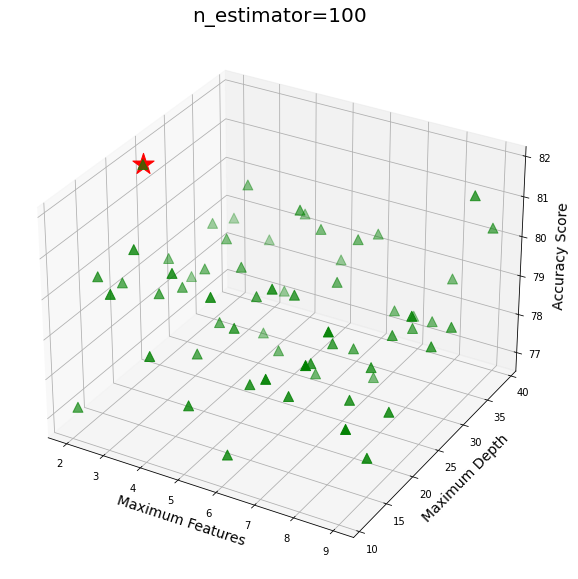

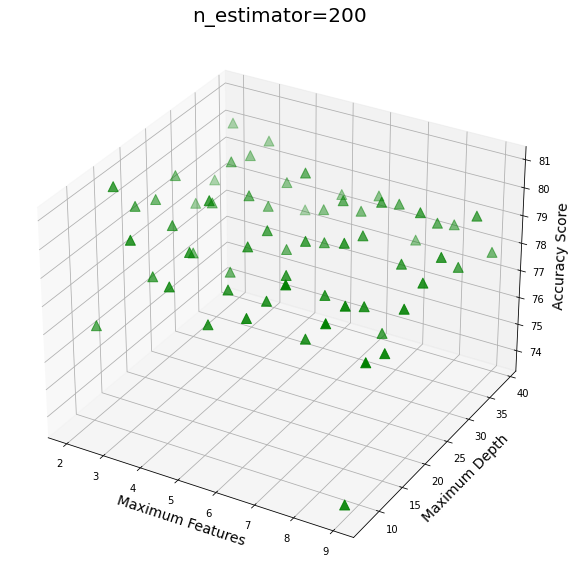

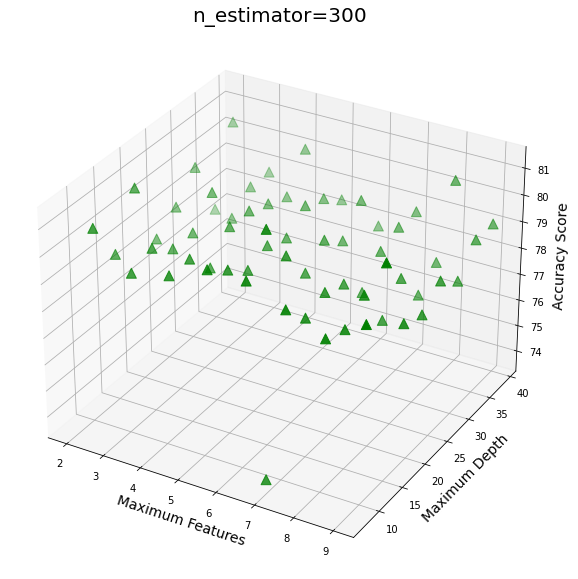

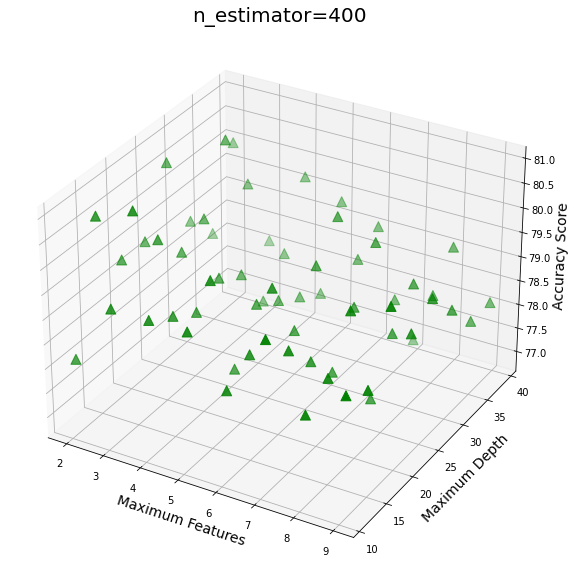

In [139]:
for subplot_idx in range(number_of_subplots):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    X = np.zeros((models_in_each_plot,))
    for i in range(models_in_each_plot):
        X[i] = RF_hyper_param_array[i+subplot_idx*models_in_each_plot,1]
    Y = np.zeros((models_in_each_plot,))
    for i in range(models_in_each_plot):
        Y[i] = RF_hyper_param_array[i+subplot_idx*models_in_each_plot,2]
    Z = np.zeros((models_in_each_plot,))
    for i in range(models_in_each_plot):
        Z[i] = RF_score_array[i+subplot_idx*models_in_each_plot,0]
    ax.set_xlabel('Maximum Features', fontsize=14)
    ax.set_ylabel('Maximum Depth', fontsize=14)
    ax.set_zlabel('Accuracy Score', fontsize=14)
    zmax = np.max(RF_score_array[:,0])
    high_score =.9
    #fig.suptitle('n_estimator=%i' %(n_estimator_strarting_point+n_estimator_step_size*subplot_idx))
    ax.set_title('n_estimator=%i' %(n_estimator_strarting_point+n_estimator_step_size*subplot_idx), fontsize =20)
    ax.scatter(X[Z>zmax*high_score], Y[Z>zmax*high_score], Z[Z>zmax*high_score], marker='^',c="green", s=100)
    ax.scatter(X[Z==zmax], Y[Z==zmax], Z[Z==zmax], marker='*',c="red", s=500)
    #print("\n\n")
plt.show()